First Part

In [91]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


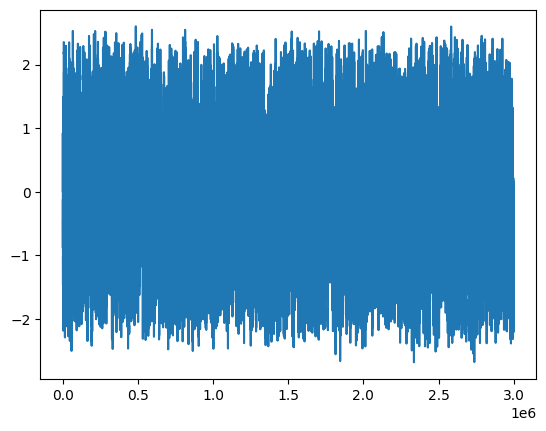

In [92]:
# Read data and plot it
# Mount drive ti get data
from google.colab import drive
drive.mount('/content/drive')

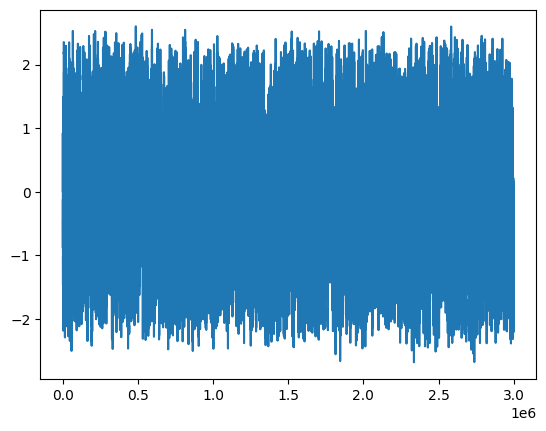

In [108]:
# Load data
df = np.loadtxt('/content/drive/MyDrive/data/0-001.txt')

#Plot the data
plt.plot(df)
bins = 51

In [93]:
# Calculating needed values
hist_values, bin_edges = np.histogram(df, bins=bins)
max = np.max(df)
min = np.min(df)

In [94]:
# Calculation diffrences
tool = len(df)
diffrences = []
binmid_list = []
for i in range(bins):
  binmid = (bin_edges[i] + bin_edges[i+1]) /2
  binmid_list.append(binmid)
  diff = []
  for j in range(tool):
    if df[j]>= bin_edges[i] and df[j] < bin_edges[i+1] and j != tool-1:
      ekhtelaf = df[j+1] - df[j]
      diff.append(ekhtelaf)
  diffrences.append(diff)

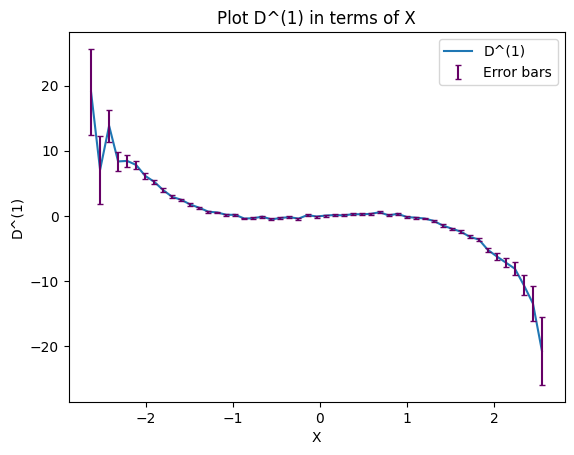

In [144]:
# Calculating D^(1)
D1_dt = []
errors_dt =[]
for j in range(bins):
  d1 = (sum(diffrences[j]))/len(diffrences[j])
  res = pd.Series(diffrences[j]).var()
  sem = (res/len(diffrences[j]))**(1/2)
  errors_dt.append(sem)
  D1_dt.append(d1)

D1 = [i * 1000 for i in D1_dt]
errors = [i * 1000 for i in errors_dt]
plt.plot(binmid_list,D1, label='D^(1)')
plt.errorbar(binmid_list, D1, yerr=errors, fmt='none', color='#660066', capsize=2, label='Error bars')
plt.legend()
plt.xlabel("X")
plt.ylabel("D^(1)")
plt.title('Plot D^(1) in terms of X')
plt.show()

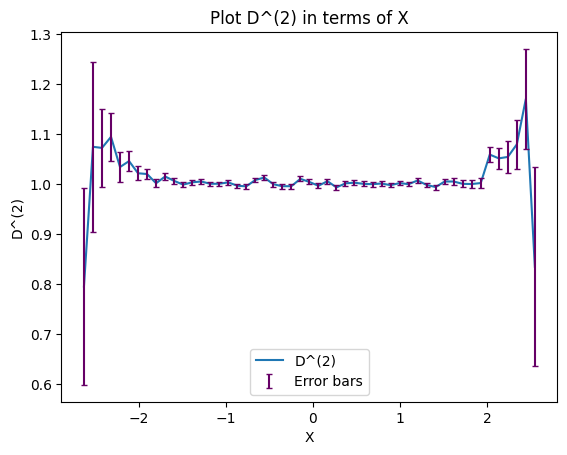

In [138]:
# Calculating D^(2)
D2_dt = []
errors_dt =[]
for j in range(bins):
  double_list = np.power(diffrences[j], 2)
  d1 = (sum(double_list))/len(diffrences[j])
  res = pd.Series(double_list).var()
  sem = (res/len(double_list))**(1/2)
  errors_dt.append(sem)
  D2_dt.append(d1)

D2 = [i * (1000/2) for i in D2_dt]
errors = [i * (1000/2) for i in errors_dt]
plt.plot(binmid_list,D2, label='D^(2)')
plt.errorbar(binmid_list, D2, yerr=errors, fmt='none', color='#660066', capsize=2, label='Error bars')
plt.legend()
plt.xlabel("X")
plt.ylabel("D^(2)")
plt.title('Plot D^(2) in terms of X')
plt.show()

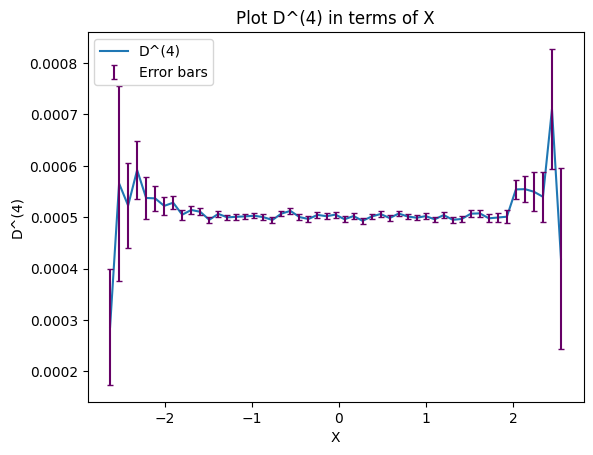

In [141]:
# Calculating D^(4)
D4_dt = []
errors_dt =[]
for j in range(bins):
  power4_list = np.power(diffrences[j], 4)
  d1 = (sum(power4_list))/len(diffrences[j])
  res = pd.Series(power4_list).var()
  sem = (res/len(power4_list))**(1/2)
  errors_dt.append(sem)
  D4_dt.append(d1)

D4 = [i * (1000/24) for i in D4_dt]
errors = [i * (1000/24) for i in errors_dt]
plt.plot(binmid_list,D4, label='D^(4)')
plt.errorbar(binmid_list, D4, yerr=errors, fmt='none', color='#660066', capsize=2, label='Error bars')
plt.legend()
plt.xlabel("X")
plt.ylabel("D^(4)")
plt.title('Plot D^(4) in terms of X')
plt.show()

Second Part

In [135]:
data = df
diffr = []
for i in range(len(data)-1):
  diff = data[i+1]-data[i]
  diffr.append(diff)



y1 = [map(lambda x, y: x * y**i, diffr, data) for i in range(4)]

tau=1
y = data[tau:] - data[:-tau]
data1 = np.ones(len(data))
ys = np.zeros(4)
for i in range(4):
  ys[i] = np.mean(y)
  y *= data[:-1]


mmnts = np.ones(7)
xk = np.ones(len(data))
for i in range(7):
  mmnts[i] = xk.mean()
  xk *= data

A = np.zeros((4,4))
for i in range(4):
  A[i] = np.roll(mmnts, -i)[:4]

A_inv = np.linalg.inv(A)
phis = A_inv@ys
phis = phis/0.001
x = np.linspace(-3,3, 10001)

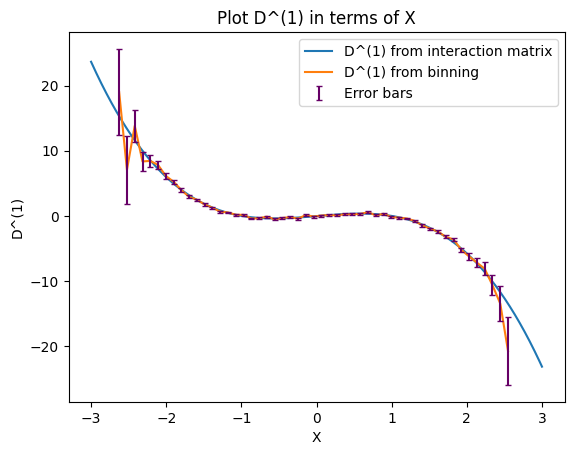

In [145]:
plt.plot(x,np.array([phis[i]*x**i for i in range(4)]).sum(0), label='D^(1) from interaction matrix')
plt.plot(binmid_list,D1, label='D^(1) from binning')
plt.errorbar(binmid_list, D1, yerr=errors, fmt='none', color='#660066', capsize=2, label='Error bars')
plt.legend()
plt.xlabel("X")
plt.ylabel("D^(1)")
plt.title('Plot D^(1) in terms of X')
plt.show()

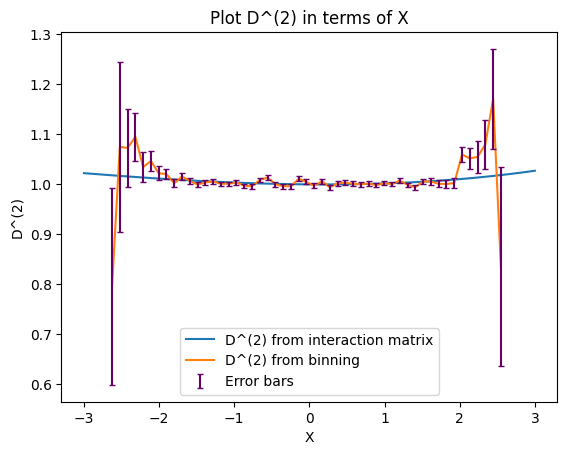

In [139]:
tau=1
y = data[tau:] - data[:-tau]
y = y**2
ys2 = np.zeros(4)
for i in range(4):
  ys2[i] = np.mean(y)
  y *= data[:-1]


phis2 = A_inv@ys2
phis2 = phis2/0.002
x = np.linspace(-3,3, 10001)

plt.plot(x,np.array([phis2[i]*x**i for i in range(4)]).sum(0), label='D^(2) from interaction matrix')
plt.plot(binmid_list,D2, label='D^(2) from binning')
plt.errorbar(binmid_list, D2, yerr=errors, fmt='none', color='#660066', capsize=2, label='Error bars')
plt.legend()
plt.xlabel("X")
plt.ylabel("D^(2)")
plt.title('Plot D^(2) in terms of X')
plt.show()

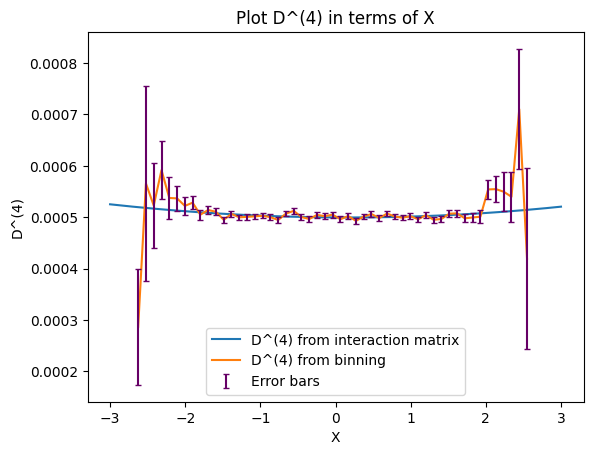

In [143]:
tau=1
y = data[tau:] - data[:-tau]
y = y**4
ys4 = np.zeros(4)
for i in range(4):
  ys4[i] = np.mean(y)
  y *= data[:-1]


phis4 = A_inv@ys4
phis4 = phis4/0.024
x = np.linspace(-3,3, 10001)

plt.plot(x,np.array([phis4[i]*x**i for i in range(4)]).sum(0), label='D^(4) from interaction matrix')
plt.plot(binmid_list,D4, label='D^(4) from binning')
plt.errorbar(binmid_list, D4, yerr=errors, fmt='none', color='#660066', capsize=2, label='Error bars')
plt.legend()
plt.xlabel("X")
plt.ylabel("D^(4)")
plt.title('Plot D^(4) in terms of X')
plt.show()